In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
df = pd.read_csv('creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Shape of dataset: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V2

Class
0    284315
1       492
Name: count, dtype: int64


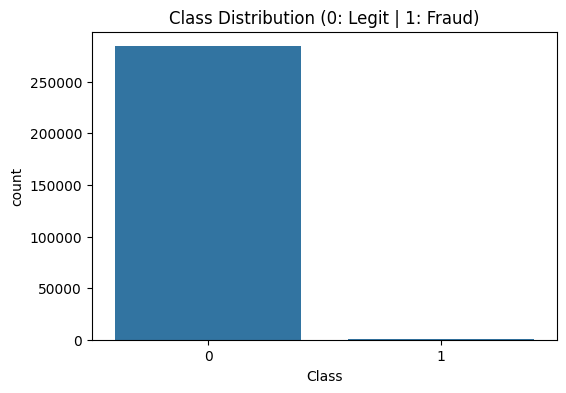

Fraud Ratio: 0.00173


In [8]:
# Value counts
fraud_counts = df['Class'].value_counts()
print(fraud_counts)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0: Legit | 1: Fraud)")
plt.show()

# Fraud ratio
fraud_ratio = fraud_counts[1] / fraud_counts.sum()
print(f"Fraud Ratio: {fraud_ratio:.5f}")

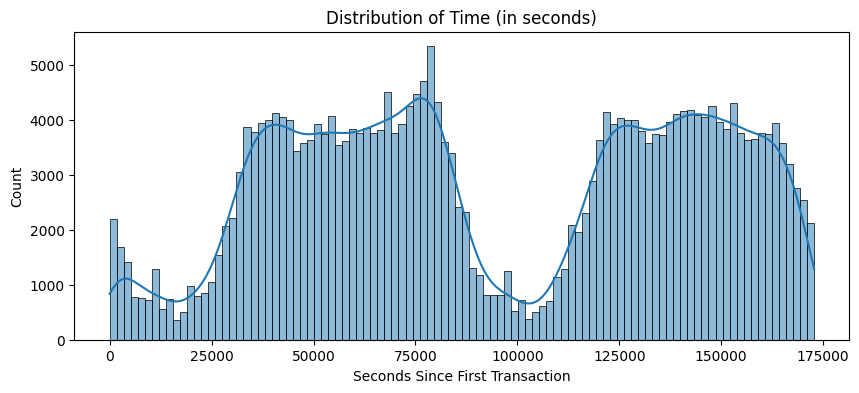

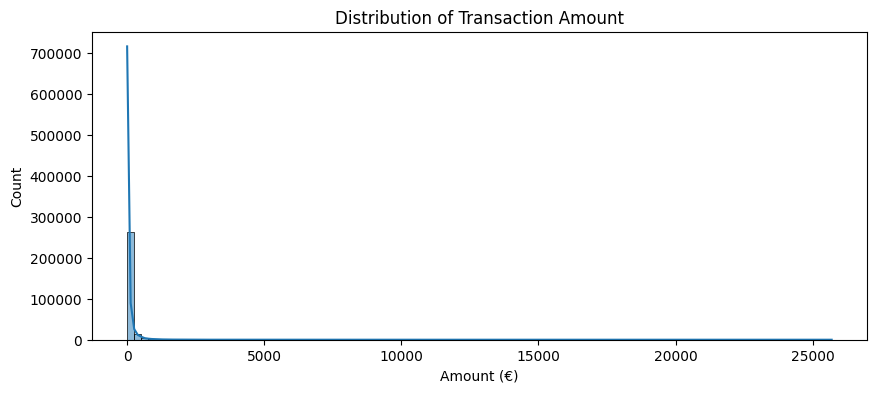

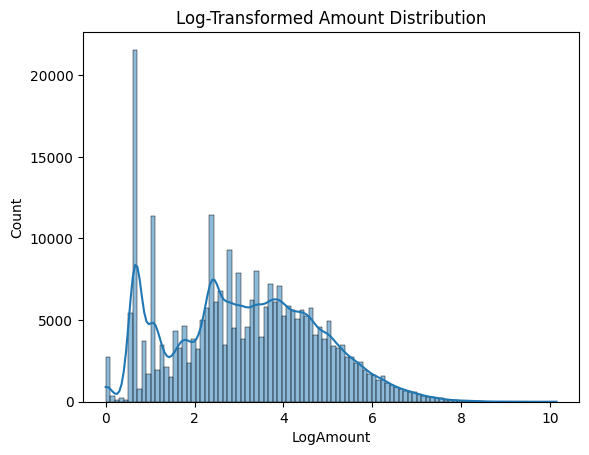

In [9]:
# Time Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title("Distribution of Time (in seconds)")
plt.xlabel("Seconds Since First Transaction")
plt.show()

# Amount Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount (€)")
plt.show()

# Log-transform for better visibility
df['LogAmount'] = np.log1p(df['Amount'])
sns.histplot(df['LogAmount'], bins=100, kde=True)
plt.title("Log-Transformed Amount Distribution")
plt.show()

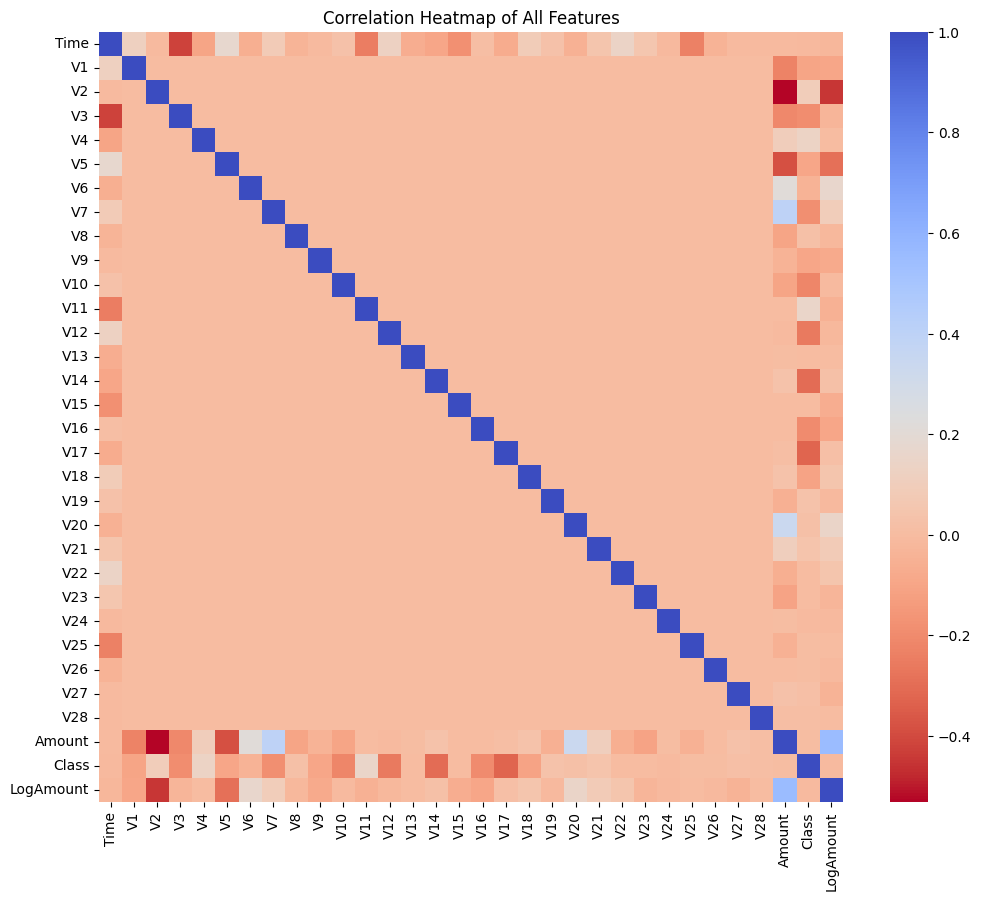

In [10]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title("Correlation Heatmap of All Features")
plt.show()

In [11]:
# Correlation with target
corr_target = corr['Class'].sort_values(ascending=False)
print("Top features positively correlated with fraud:\n", corr_target.head(10))
print("Top features negatively correlated with fraud:\n", corr_target.tail(10))

Top features positively correlated with fraud:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64
Top features negatively correlated with fraud:
 V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64
